# Lecture 17: Fast Fourier Transform: Part 1

First, we will load the Python packages which will be used in this demo:

In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft,rfftfreq
from pandas import read_csv

## Activity 1: Exploring time and frequency space
In this activity, well test how the Fourier transform modifies functions constructed from combinations of simple sinusoidal curves.

First, define a function to apply the FFT to a timeseries, and plot a comparison between the two:

In [39]:
def calculate_and_plot_fft_example(a1,f1,a2,f2,a3,f3):
    # generate the time array
    n_timesteps = 1000
    timestep = (2*np.pi)/n_timesteps # seconds
    max_time = n_timesteps*timestep # seconds
    time = np.arange(0, max_time, timestep) # seconds
    max_frequency = 1/(n_timesteps*timestep) # Hz
    
    # make the sin curves
    y_1 = a1*np.sin(f1*2*np.pi*time/max_time) # meters
    y_2 = a2*np.sin(f2*2*np.pi*time/max_time) # meters
    y_3 = a3*np.sin(f3*2*np.pi*time/max_time) # meters
    y = y_1 + y_2 + y_3
    
    # apply FFT to curve
    y_fft = np.abs(rfft(y)) # meters
    x_fft = rfftfreq(np.size(y),timestep) # Hz
    
    # apply some scalings for an intuitive plot
    y_fft_scaled = y_fft/(len(time)/2)
    cycles = x_fft/max_frequency
    
    # make a figure
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.plot(time,y,linewidth=3)
    plt.ylabel('Amplitude (m)',fontsize=14)
    plt.xlabel('Time',fontsize=14)
    plt.grid(linestyle='--',alpha=0.4)
    plt.title('Signal',fontsize=17)
    plt.xticks([0,np.pi/2,np.pi,3*np.pi/2,2*np.pi],fontsize=14)
    plt.gca().set_xticklabels([0,'$\pi/2$','$\pi$','$3\pi/2$','$2\pi$'])
    plt.yticks(fontsize=14)
    
    plt.subplot(1,2,2)
    plt.bar(cycles,y_fft_scaled)
    plt.ylabel('Amplitude (m)',fontsize=14)
    plt.xlabel('Cycles',fontsize=14)
    plt.grid(linestyle='--',alpha=0.4)
    plt.xlim([-1,10+1]) # note: 10 is the max multiplier of y1
    plt.xticks(np.arange(11),fontsize=14)
    plt.yticks(fontsize=14)
    plt.title('FFT of Signal',fontsize=17)
    plt.show()

Using the Python function above, we can the FFT algorithm on an example function over a 2$\pi$ interval:

$$
y(t) = a_1\text{sin}\left(f_1 2\pi\, t\right) + a_2\text{sin}\left(f_2 2\pi\, t\right) + a_3\text{sin}\left(f_3 2\pi \,t\right)
$$

### Check your mathematical intuition!
Before we plot the function above, can you visualize what it will look like?

In [42]:
interact(calculate_and_plot_fft_example,
         a1=widgets.IntSlider(min=0, max=10, step=1, value=1),
         f1=widgets.IntSlider(min=0, max=10, step=1, value=1),
         a2=widgets.IntSlider(min=0, max=10, step=1, value=0),
         f2=widgets.IntSlider(min=0, max=10, step=1, value=0),
         a3=widgets.FloatSlider(min=0, max=1, step=0.1, value=0),
         f3=widgets.IntSlider(min=0, max=10, step=1, value=0));

interactive(children=(IntSlider(value=1, description='a1', max=10), IntSlider(value=1, description='f1', max=1…

#### Questions for exploration
1. How does varying the period $p_1$ affect the signal? its FFT?
2. How does varying the amplitude $a_1$ affect the signal? its FFT?
3. How does the signal vary when a second curve is added? its FFT?
4. How does the signal vary when a third curve is added? its FFT?

## Activity 2: Using FFT with real data
Next, we'll apply the fast fourier transform to a real dataset and explore what the frequency space can tell us about the data. 

In this example, we will use example tide data from a local tide guage in Monterey, CA. The tide data is provided in this repository in the file `CO-OPS_9413450_wl.csv` obtained from https://tidesandcurrents.noaa.gov/harcon.html?id=9413450. 


First, read in the tide data as a numpy array:

In [4]:
df = read_csv('CO-OPS_9413450_wl.csv', header=0, parse_dates=[['Date', 'Time (GMT)']])
print(df.head())

      Date_Time (GMT)  Predicted (ft) Preliminary (ft)  Verified (ft)
0 2022-03-01 00:00:00          -5.744                -          -5.81
1 2022-03-01 00:06:00          -5.695                -          -5.73
2 2022-03-01 00:12:00          -5.639                -          -5.69
3 2022-03-01 00:18:00          -5.578                -          -5.76
4 2022-03-01 00:24:00          -5.511                -          -5.58


## Plot the data
It's always a good idea to visualize the data you're working with. Start by making a plot of the tide data:

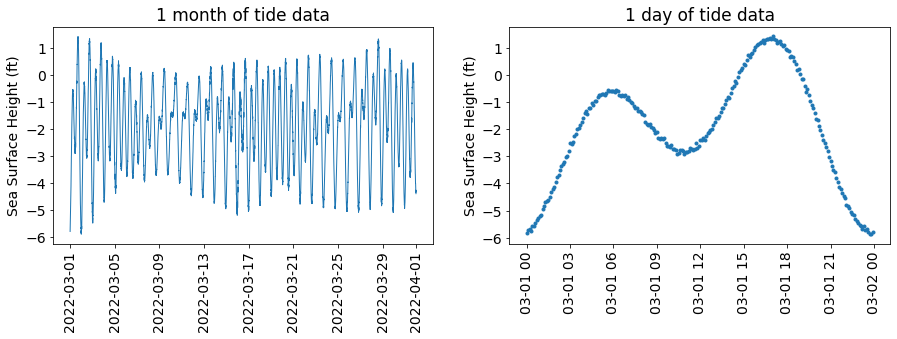

In [14]:
fig = plt.figure(figsize=(15,4))

# make a plot of all the data
plt.subplot(1,2,1)
plt.plot(df['Date_Time (GMT)'],df['Verified (ft)'],'-',linewidth=1)
plt.title('1 month of tide data',fontsize=17)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Sea Surface Height (ft)',fontsize=14)

# make a plot of just the first few days
plt.subplot(1,2,2)
plt.plot(df['Date_Time (GMT)'][:10*24*1],df['Verified (ft)'][:10*24*1],'.',linewidth=1)
plt.title('1 day of tide data',fontsize=17)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Sea Surface Height (ft)',fontsize=14)

plt.show()

## Apply the Fourier Transform and Make a Plot

In [ ]:
### type your code here using's scipy's rfft and rfftfreq functions
### note that the tide data is provided every 6 minutes

signal = df['Verified (ft)'].values
N_samples = df['Verified (ft)'].size
sample_duration = 6*60 # 6 minutes, expressed in seconds

### apply the FFT

### make a plot

### Possible Solutions to Activity 2

This is a solution to Activity 2 prior to scaling:

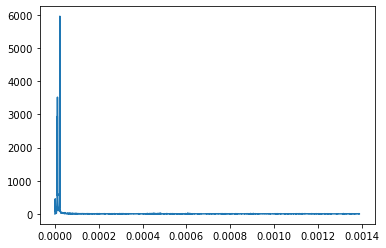

In [7]:
### type your code here using's scipy's rfft and rfftfreq functions
### note that the tide data is provided every 6 minutes

signal = df['Verified (ft)'].values
N_samples = df['Verified (ft)'].size
sample_duration = 6*60 # 6 minutes, expressed in seconds

signal = signal - np.mean(signal)

### apply the FFT
y = np.abs(rfft(signal))
x = rfftfreq(N_samples, sample_duration)

### make a plot
plt.plot(x,y)
plt.show()

### Another Possible Solution to Activity 2

This is another possible solution after scaling

In [ ]:
### type your code here using's scipy's rfft and rfftfreq functions
### note that the tide data is provided every 6 minutes

signal = df['Verified (ft)'].values
N_samples = df['Verified (ft)'].size
sample_duration = 6*60 # 6 minutes, expressed in seconds

### apply the FFT
y = np.abs(rfft(signal))
x = rfftfreq(N_samples, sample_duration)

# remove the frequency near 0
x = x[1:]
y = y[1:]

### scale the x and y values
# x values are in units of 1/seconds
x = x * 60 * 60 # convert to 1/hours
x = 1/x
y = y / (N_samples/2)

### make a plot
plt.plot(x,y)
#plt.gca().set_xlim([0,0.1])
#plt.xlabel('Frequency (1/hour)')
plt.gca().set_xlim([0,30])
plt.xlabel('Period (hour)')
plt.ylabel('Amplitude (ft)')
plt.show()